In [1]:
import pandas as pd
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from vecstack import stacking
import math

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel("US Superstore data.xls")
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City    ...     \
0      Claire Gute   Consumer  United States        Henderson    ...      
1      Claire Gute   Consumer  United States        Henderson    ...      
2  Darrin Van Huff  Corporate  United States      Los Angeles    ...      
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale    ...      
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale    ...      

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [3]:
pp.ProfileReport(df)

In [4]:
df.shape

(9994, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row_ID           9994 non-null int64
Order_ID         9994 non-null object
Order_Date       9994 non-null datetime64[ns]
Ship_Date        9994 non-null datetime64[ns]
Ship_Mode        9994 non-null object
Customer_ID      9994 non-null object
Customer_Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal_Code      9994 non-null int64
Region           9994 non-null object
Product_ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product_Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Profit  City  Order_ID  Order_Date  Ship_Date  Ship_Mode  \
Total       0.0   0.0       0.0         0.0        0.0        0.0   
Percent     0.0   0.0       0.0         0.0        0.0        0.0   

         Customer_ID  Customer_Name  Segment  Country   ...    Discount  \
Total            0.0            0.0      0.0      0.0   ...         0.0   
Percent          0.0            0.0      0.0      0.0   ...         0.0   

         Postal_Code  Region  Product_ID  Category  Sub-Category  \
Total            0.0     0.0         0.0       0.0           0.0   
Percent          0.0     0.0         0.0       0.0           0.0   

         Product_Name  Sales  Quantity  Row_ID  
Total             0.0    0.0       0.0     0.0  
Percent           0.0    0.0       0.0     0.0  

[2 rows x 21 columns]

In [7]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

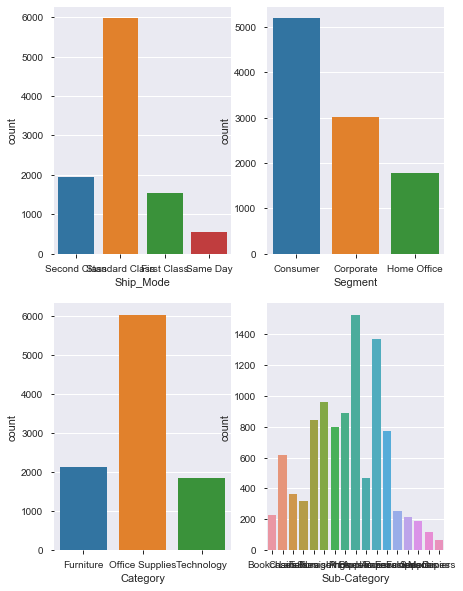

In [8]:
fig,ax=plt.subplots(2,2,figsize=(7,10))
sns.countplot(df['Ship_Mode'],ax=ax[0,0])
sns.countplot(df['Segment'],ax=ax[0,1])
sns.countplot(df['Category'],ax=ax[1,0])
sns.countplot(df['Sub-Category'],ax=ax[1,1])

In [9]:
#Dropping  Row ID column and assigning to df
df=df.drop(['Row_ID','Country'],axis=1)
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420   
1      Claire Gute   Consumer        Henderson    Kentucky        42420   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   

  Region       Product_ID         Category Sub-Category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [10]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [12]:
df['Product_Name'].value_counts()

Staple envelope                                                              48
Staples                                                                      46
Easy-staple paper                                                            46
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      19
Staple remover                                                               18
KI Adjustable-Height Table                                                   18
Storex Dura Pro Binders                                                      17
Staple-based wall hangings                                                   16
Situations Contoured Folding Chairs, 4/Set                                   15
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling                    15
Eldon Wave Desk Accessories                                                  14
Global High-Back Leather Tilter, Burgund

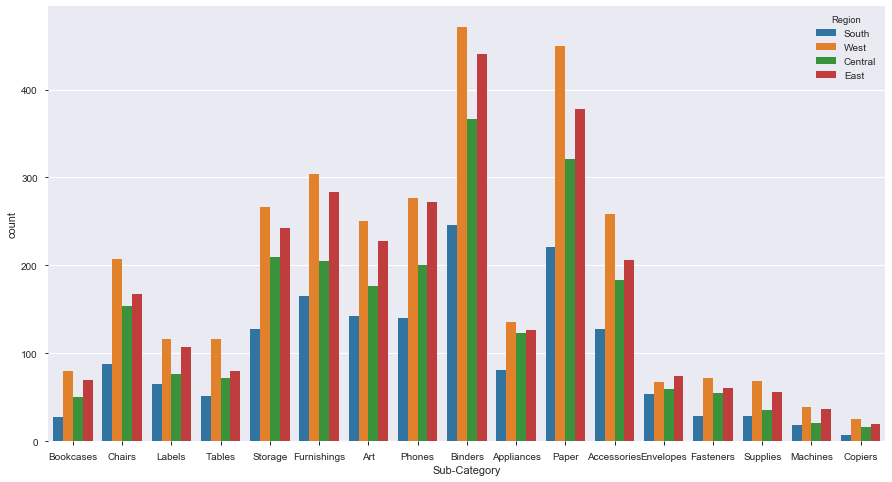

In [13]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

In [14]:
df['Cost']=df['Sales']-df['Profit']
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420   
1      Claire Gute   Consumer        Henderson    Kentucky        42420   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   

  Region       Product_ID         Category Sub-Category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit       Cost  
0      0.00   41.9136   220.0464  
1      0.00  219.5820   512.3580  
2      0.00    6.8714     7.7486  
3      0.45 -383.0310  1340.6085  
4      0.20    2.5164    19.8516

In [15]:
df['Profit %']=(df['Profit']/df['Cost'])*100
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420   
1      Claire Gute   Consumer        Henderson    Kentucky        42420   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   

     ...           Product_ID         Category Sub-Category  \
0    ...      FUR-BO-10001798        Furniture    Bookcases   
1    ...      FUR-CH-10000454        Furniture       Chairs   
2    ...      OFF-LA-10000240  Office Supplies       Labels   
3    ...      FUR-TA-10000577        Furniture       Tables   
4    ...      OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit       Cost   Profit %  
0      0.00   41.9136   220.0464  19.047619  
1      0.00  219.5820   512.3580  42.857143  
2      0.00    6.8714     7.7486  88.679245  
3      0.45 -383.0310  1340.6085 -28.571429  
4      0.20    2.5164    19.8516  12.676056  

[5 rows x 21 columns]

In [16]:
#Products with high Profit Percentage 
df.sort_values(['Profit %','Product_Name'],ascending=False).groupby('Profit %').head(10)

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
1696  CA-2015-156335 2015-09-25 2015-09-28    Second Class    PO-19195   
4611  CA-2016-109407 2016-01-24 2016-01-26    Second Class    HG-14965   
3984  CA-2016-135265 2016-07-07 2016-07-09    Second Class    CC-12370   
4651  CA-2017-150987 2017-04-08 2017-04-12  Standard Class    AH-10120   
6600  CA-2014-154095 2014-12-02 2014-12-07  Standard Class    ON-18715   
8656  CA-2014-142769 2014-09-13 2014-09-13        Same Day    RP-19390   
6959  CA-2015-167255 2015-09-27 2015-09-29    Second Class    RH-19510   
7794  CA-2015-127481 2015-12-12 2015-12-15    Second Class    JD-15895   
4017  CA-2015-165624 2015-08-23 2015-08-28  Standard Class    FH-14350   
6681  CA-2017-145037 2017-09-02 2017-09-07    Second Class    TB-21055   
8422  CA-2017-150091 2017-10-12 2017-10-16  Standard Class    NP-18670   
9336  CA-2017-130715 2017-09-16 2017-09-20  Standard Class    CY-12745   
887   CA-2017-150707 2017-10-14 2017-10-19  Standard Class    EL-13735   
888   CA-2014-104976 2014-12-09 2014-12-16  Standard Class    CK-12760   
1990  CA-2015-127509 2015-11-09 2015-11-13  Standard Class    AS-10090   
3114  CA-2016-150350 2016-08-23 2016-08-30  Standard Class    MS-17770   
4111  CA-2015-153717 2015-12-25 2016-01-01  Standard Class    DL-13495   
5334  CA-2014-103331 2014-08-26 2014-09-01  Standard Class    KB-16315   
3944  CA-2016-133144 2016-05-16 2016-05-21    Second Class    DO-13435   
4015  CA-2015-165624 2015-08-23 2015-08-28  Standard Class    FH-14350   
4783  US-2017-147984 2017-01-28 2017-02-01  Standard Class    GB-14575   
1117  CA-2015-142755 2015-09-04 2015-09-08  Standard Class    CS-12355   
6508  CA-2017-102197 2017-12-20 2017-12-26  Standard Class    DK-13150   
5477  CA-2017-169691 2017-06-15 2017-06-18     First Class    Dp-13240   
5699  CA-2017-148320 2017-11-03 2017-11-08  Standard Class    PG-18895   
5877  CA-2014-152443 2014-05-21 2014-05-26  Standard Class    FG-14260   
418   CA-2017-154816 2017-11-06 2017-11-10  Standard Class    VB-21745   
3521  CA-2016-114482 2016-11-21 2016-11-25    Second Class    DM-13345   
9594  CA-2017-108931 2017-09-14 2017-09-19  Standard Class    HZ-14950   
2892  CA-2017-139913 2017-10-23 2017-10-29  Standard Class    JC-16105   
...              ...        ...        ...             ...         ...   
8021  CA-2014-129189 2014-07-21 2014-07-25  Standard Class    HM-14860   
7852  CA-2014-169649 2014-12-09 2014-12-15  Standard Class    TS-21205   
4046  CA-2017-100356 2017-10-21 2017-10-25  Standard Class    SP-20920   
2507  CA-2015-120397 2015-07-02 2015-07-02        Same Day    RB-19435   
1995  US-2017-147221 2017-12-02 2017-12-04    Second Class    JS-16030   
7348  CA-2014-130421 2014-03-03 2014-03-07  Standard Class    SC-20020   
8876  US-2016-141264 2016-08-13 2016-08-19  Standard Class    CT-11995   
6251  CA-2014-101147 2014-12-02 2014-12-04     First Class    MC-17575   
1550  US-2017-124926 2017-11-13 2017-11-18    Second Class    ME-17320   
4614  CA-2016-144540 2016-09-05 2016-09-10  Standard Class    GH-14410   
8959  CA-2017-150266 2017-11-25 2017-11-30  Standard Class    RO-19780   
8112  CA-2016-130393 2016-12-01 2016-12-03    Second Class    JM-15865   
8246  CA-2015-129217 2015-05-10 2015-05-10        Same Day    DP-13390   
5755  CA-2014-163748 2014-10-14 2014-10-18  Standard Class    HG-15025   
6034  US-2015-155369 2015-04-19 2015-04-25  Standard Class    PG-18820   
203   US-2017-116701 2017-12-17 2017-12-21    Second Class    LC-17140   
8981  CA-2016-110898 2016-03-06 2016-03-12  Standard Class    LC-16870   
6903  CA-2017-111220 2017-09-02 2017-09-08  Standard Class    JS-15595   
9086  CA-2016-143406 2016-09-26 2016-09-30  Standard Class    LR-17035   
6989  CA-2017-165099 2017-12-11 2017-12-13     First Class    DK-13375   
6561  CA-2017-144680 2017-03-31 2017-04-02     First Class    SC-20260   
5414  US-2017-125647 2017-09-23 2017-09-28  Standard Class    LC-16870   
8916  US-2016-14

In [17]:
#Top 10 customers who order frequently
df_top10=df['Customer_Name'].value_counts().head(10)
df_top10

William Brown          37
Paul Prost             34
Matt Abelman           34
John Lee               34
Seth Vernon            32
Chloris Kastensmidt    32
Jonathan Doherty       32
Edward Hooks           32
Emily Phan             31
Arthur Prichep         31
Name: Customer_Name, dtype: int64

In [18]:
#Calculating the time taken for an order to ship and converting the no. of days in int format
df['Shipment_Duration']=(pd.to_datetime(df['Ship_Date'])-pd.to_datetime(df['Order_Date'])).dt.days
df['Shipment_Duration']

0       3
1       3
2       4
3       7
4       7
5       5
6       5
7       5
8       5
9       5
10      5
11      5
12      5
13      5
14      4
15      4
16      7
17      2
18      5
19      5
20      5
21      4
22      4
23      2
24      5
25      4
26      4
27      4
28      4
29      4
       ..
9964    5
9965    5
9966    5
9967    6
9968    6
9969    6
9970    4
9971    4
9972    6
9973    4
9974    4
9975    4
9976    4
9977    4
9978    4
9979    4
9980    3
9981    3
9982    6
9983    6
9984    6
9985    6
9986    4
9987    4
9988    4
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Shipment_Duration, Length: 9994, dtype: int64

In [19]:
def agg_customer(x):
    d = []
    d.append(x['Order_ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order_Date']).min())
    d.append(pd.to_datetime(x['Order_Date']).max())
    d.append(x['Product_Name'].unique())
    d.append(x['City'].unique())
    d.append(x['Shipment_Duration'].mean())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products_Purchased','Location_Count','Avg_delivery_time'])

In [95]:
#grouping based on Customer ID and applying the function we created above
df_agg = df.groupby('Customer_Name').apply(agg_customer)
df_agg

#Purchases  Total_Sales  Average Profit % gained  \
Customer_Name                                                            
Aaron Bergman                  6      886.156                15.186975   
Aaron Hawkins                 11     1744.700                51.896958   
Aaron Smayling                10     3050.692                 5.498078   
Adam Bellavance               18     7755.620                58.640721   
Adam Hart                     20     3250.337                34.652355   
Adam Shillingsburg            25     3255.310                32.203407   
Adrian Barton                 20    14473.571                13.329702   
Adrian Hane                   16     1735.514                18.082963   
Adrian Shami                   3       58.820                66.500363   
Aimee Bixby                   12      966.710                42.398502   
Alan Barnes                   14     1113.838                37.820026   
Alan Dominguez                12     6106.880                51.121464   
Alan Haines                    8     1587.452                -3.265373   
Alan Hwang                    13     4805.344                48.526634   
Alan Schoenberger             13     4260.784                44.348072   
Alan Shonely                  13      584.608                16.290455   
Alejandro Ballentine          14      914.532                52.936963   
Alejandro Grove               14     2582.898                44.706309   
Alejandro Savely               8     3214.236                20.869255   
Aleksandra Gannaway            5      367.548                33.154836   
Alex Avila                    11     5563.560                44.527461   
Alex Grayson                   9      660.972                30.131563   
Alex Russell                   5     1055.694                 3.915298   
Alice McCarthy                12      814.012                55.254190   
Allen Armold                  15     1056.390                52.349415   
Allen Goldenen                 8      200.945                39.888363   
Allen Rosenblatt               7     2236.128                38.463281   
Alyssa Crouse                  5      925.800                 8.505659   
Alyssa Tate                    9     1171.814                20.583147   
Amy Cox                        9     5527.846                31.681289   
...                          ...          ...                      ...   
Tony Molinari                  4     1094.678                39.192661   
Tony Sayre                    14     2243.274                14.792297   
Tracy Blumstein               20     4737.486                20.615738   
Tracy Collins                 10      742.558                41.616501   
Tracy Hopkins                 13     4234.096                46.108743   
Tracy Poddar                  10     1936.640                13.497558   
Tracy Zic                      9     1707.286                42.448713   
Troy Blackwell                 7     1387.559                10.496903   
Troy Staebel                  11     2820.424                -0.528121   
Trudy Brown                   15     2797.668                29.619564   
Trudy Glocke                  10     2074.661                38.593404   
Trudy Schmidt                 14     3368.094                19.302328   
Valerie Dominguez             16     6442.254                35.154393   
Valerie Mitchum               12     2454.866                35.602274   
Valerie Takahito               9     1736.596                -0.218587   
Vicky Freymann                11      847.944                47.993214   
Victor Preis                   5      993.902                37.312283   
Victoria Brennan              10     2005.596                33.602191   
Victoria Pisteka              14     3360.526                23.289133   
Victoria Wilson               18     6134.038                29.405649   
Vivek Gonzalez                 8      846.010                33.109549   
Vivek Grady               

In [97]:
df_agg.to_csv('C.csv')

In [98]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, Aaron Bergman to Zuschuss Donatelli
Data columns (total 8 columns):
#Purchases                 793 non-null int64
Total_Sales                793 non-null float64
Average Profit % gained    793 non-null float64
First_Purchase_Date        793 non-null datetime64[ns]
Latest_Purchase_Date       793 non-null datetime64[ns]
Products_Purchased         793 non-null object
Location_Count             793 non-null object
Avg_delivery_time          793 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 55.8+ KB


In [21]:
#extracting the year of order
df['order_year']=df['Order_Date'].dt.year
df['order_year'].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: order_year, dtype: int64

In [22]:
df['Purchases']=df.groupby(by='Order_Date')['Order_ID'].count()
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420   
1      Claire Gute   Consumer        Henderson    Kentucky        42420   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   

     ...                                           Product_Name     Sales  \
0    ...                      Bush Somerset Collection Bookcase  261.9600   
1    ...      Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400   
2    ...      Self-Adhesive Address Labels for Typewriters b...   14.6200   
3    ...          Bretford CR4500 Series Slim Rectangular Table  957.5775   
4    ...                         Eldon Fold 'N Roll Cart System   22.3680   

  Quantity Discount    Profit       Cost   Profit %  Shipment_Duration  \
0        2     0.00   41.9136   220.0464  19.047619                  3   
1        3     0.00  219.5820   512.3580  42.857143                  3   
2        2     0.00    6.8714     7.7486  88.679245                  4   
3        5     0.45 -383.0310  1340.6085 -28.571429                  7   
4        2     0.20    2.5164    19.8516  12.676056                  7   

   order_year  Purchases  
0        2016        NaN  
1        2016        NaN  
2        2016        NaN  
3        2015        NaN  
4        2015        NaN  

[5 rows x 24 columns]

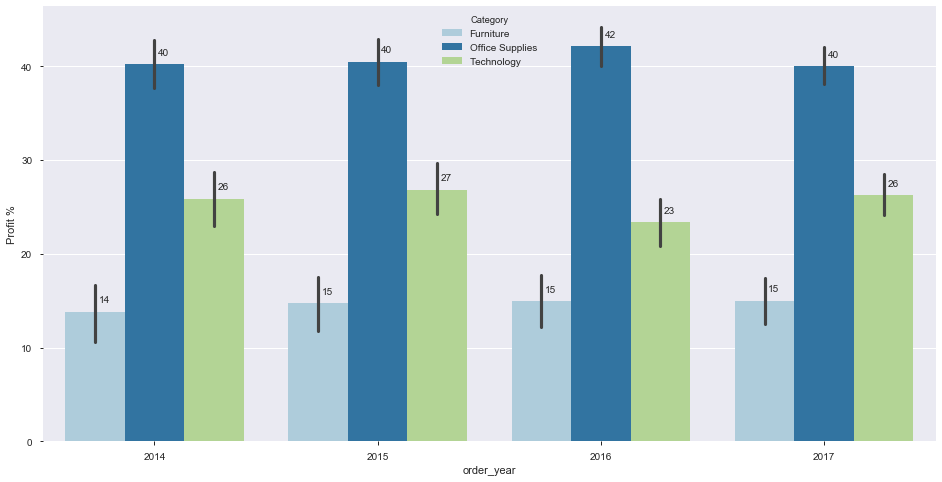

In [23]:
#Calculating Profit gained in each Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order_year','Profit %',hue='Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

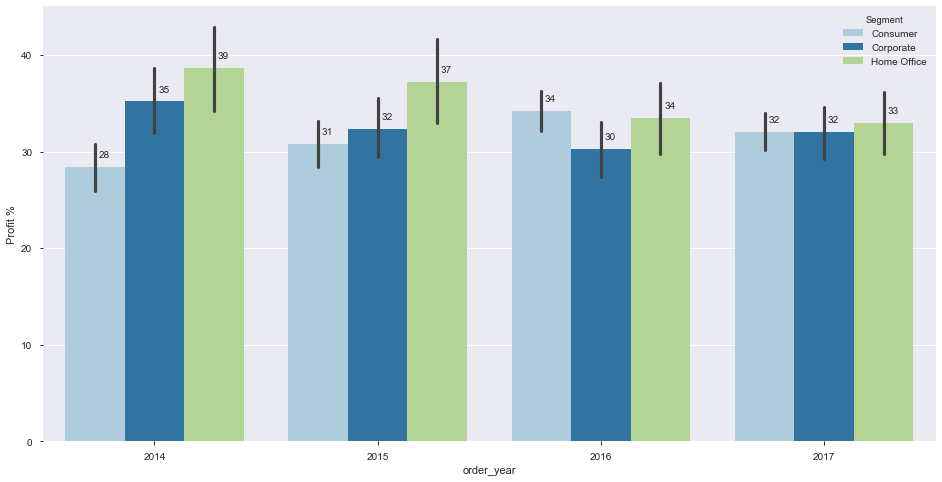

In [24]:
#Calculating Profit gained in each segment
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order_year','Profit %',hue='Segment',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

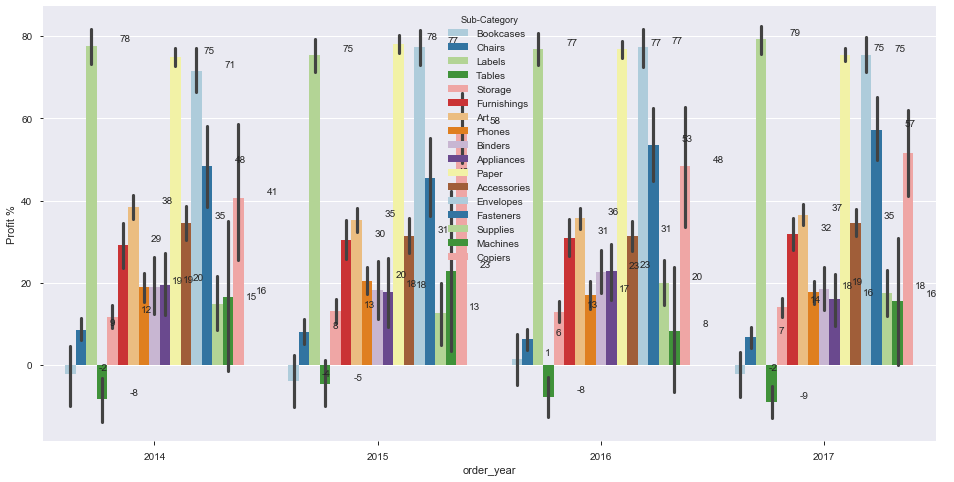

In [25]:
#Calculating Profit gained in each sub-Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order_year','Profit %',hue='Sub-Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

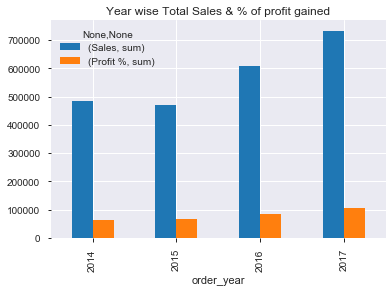

In [26]:
#Sales per year
df.groupby('order_year')['Sales','Profit %'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

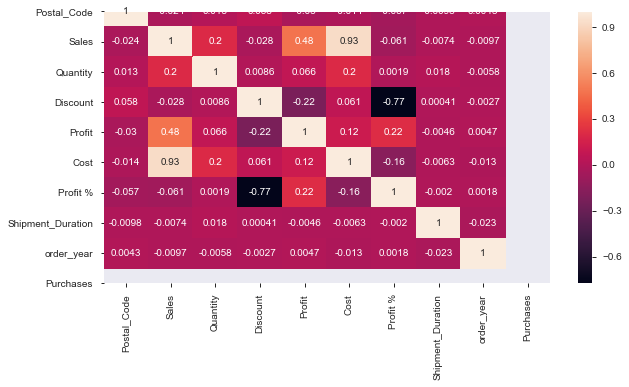

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Cost', 'Profit %',
       'Shipment_Duration', 'order_year', 'Purchases'],
      dtype='object')

In [29]:
df1=df.pivot_table(index=['Order_Date'])
df1=df1.reset_index()
df1.head()

Order_Date        Cost  Discount   Postal_Code      Profit   Profit %  \
0 2014-01-03   10.896800       0.2  77095.000000    5.551200  50.943396   
1 2014-01-04  118.016700       0.4  60540.000000  -21.996700  -7.704496   
2 2014-01-05   14.652000       0.2  19143.000000    4.884000  33.333333   
3 2014-01-06  338.783067       0.0  46399.333333  150.894711  53.941714   
4 2014-01-07   79.560050       0.7  77340.000000  -35.981050 -52.406417   

   Quantity       Sales  Shipment_Duration  order_year  
0  2.000000   16.448000           4.000000        2014  
1  2.666667   96.020000           4.000000        2014  
2  3.000000   19.536000           7.000000        2014  
3  3.333333  489.677778           3.444444        2014  
4  5.000000   43.579000           5.000000        2014

In [30]:
df1.shape

(1237, 10)

In [31]:
mask=(df1.Order_Date>'2014-01-01')
df2=df1.loc[mask]

In [32]:
df2.columns

Index(['Order_Date', 'Cost', 'Discount', 'Postal_Code', 'Profit', 'Profit %',
       'Quantity', 'Sales', 'Shipment_Duration', 'order_year'],
      dtype='object')

In [33]:
A = df2.copy()
A['Avg_Sales_2018']=A['Sales'].shift(-365)
A['Avg_profit_2018']=A['Profit %'].shift(-365)
A['Avg_profits_2018']=A['Profit'].shift(-365)
A['Avg_cost_2018']=A['Cost'].shift(-365)

In [34]:
A.tail()

Order_Date        Cost  Discount   Postal_Code     Profit   Profit %  \
1232 2017-12-26  188.368450  0.225000  60904.250000  15.280050  24.709988   
1233 2017-12-27  104.805100  0.300000  43055.000000 -15.987100  10.061408   
1234 2017-12-28   73.906947  0.216842  59738.052632  13.322042  23.990996   
1235 2017-12-29  189.258350  0.033333  60797.000000  53.702817  52.700772   
1236 2017-12-30   87.464786  0.142857  49547.428571  14.505214  25.844459   

      Quantity       Sales  Shipment_Duration  order_year  Avg_Sales_2018  \
1232  3.000000  203.648500           4.000000        2017             NaN   
1233  3.000000   88.818000           0.000000        2017             NaN   
1234  3.368421   87.228989           4.842105        2017             NaN   
1235  3.416667  242.961167           3.833333        2017             NaN   
1236  3.285714  101.970000           4.285714        2017             NaN   

      Avg_profit_2018  Avg_profits_2018  Avg_cost_2018  
1232              NaN               NaN            NaN  
1233              NaN               NaN            NaN  
1234              NaN               NaN            NaN  
1235              NaN               NaN            NaN  
1236              NaN               NaN            NaN

In [35]:
y_A = A.dropna()['Avg_Sales_2018']
y_A1 = A.dropna()['Avg_profit_2018']
y_A2 = A.dropna()['Avg_profits_2018']
y_A3 = A.dropna()['Avg_cost_2018']

In [36]:
X_A = A.dropna().drop(['Avg_Sales_2018','Avg_profit_2018','Avg_profits_2018','Avg_cost_2018','Sales','Profit %','Order_Date'], axis=1)

In [37]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.3,train_size=.7,random_state=42)
X_train_A1, X_test_A1, y_train_A1, y_test_A1 = train_test_split(X_A, y_A1, test_size=0.3,train_size=.7,random_state=42)
X_train_A2, X_test_A2, y_train_A2, y_test_A2= train_test_split(X_A, y_A2, test_size=0.3,train_size=.7,random_state=42)
X_train_A3, X_test_A3, y_train_A3, y_test_A3= train_test_split(X_A, y_A3, test_size=0.3,train_size=.7,random_state=42)
X_forecast_A =  A.tail(365).drop(['Avg_Sales_2018','Avg_profit_2018','Avg_profits_2018','Avg_cost_2018','Sales','Profit %','Order_Date'], axis=1)

In [38]:
len(y_A)

872

In [39]:
X_A.shape

(872, 7)

In [40]:
A

Order_Date        Cost  Discount   Postal_Code      Profit   Profit %  \
0    2014-01-03   10.896800  0.200000  77095.000000    5.551200  50.943396   
1    2014-01-04  118.016700  0.400000  60540.000000  -21.996700  -7.704496   
2    2014-01-05   14.652000  0.200000  19143.000000    4.884000  33.333333   
3    2014-01-06  338.783067  0.000000  46399.333333  150.894711  53.941714   
4    2014-01-07   79.560050  0.700000  77340.000000  -35.981050 -52.406417   
5    2014-01-09   14.813000  0.200000  78041.000000    5.459000  29.870130   
6    2014-01-10   16.088150  0.000000  22153.000000   11.326850  79.085385   
7    2014-01-11    6.858600  0.000000  19901.000000    3.081400  44.927536   
8    2014-01-13  261.832400  0.095455  68496.000000   61.239873  41.547099   
9    2014-01-14  115.245600  0.500000  19140.000000  -53.285600 -46.236559   
10   2014-01-15   83.972000  0.000000  30076.000000   65.978000  78.571429   
11   2014-01-16   76.474375  0.375000  19134.000000   -1.483375   4.416990   
12   2014-01-18   58.377600  0.200000  97477.000000    6.486400  11.111111   
13   2014-01-19  166.647900  0.450000  85254.000000  -71.999400  -0.343391   
14   2014-01-20  122.911794  0.047059  61008.882353   34.374676  45.232227   
15   2014-01-21   21.145200  0.200000  33180.000000    4.102800  19.402985   
16   2014-01-23   13.390800  0.000000  68510.000000    9.619200  46.153846   
17   2014-01-26  105.213667  0.000000  30170.000000   16.703000  56.788127   
18   2014-01-27  138.995767  0.066667  92037.000000    3.227567  25.941720   
19   2014-01-28    2.602300  0.200000  10024.000000    1.325700  50.943396   
20   2014-01-30  114.424900  0.000000  48234.000000    5.825100  42.455483   
21   2014-01-31  287.246400  0.150000  92691.000000    3.419600   1.190476   
22   2014-02-01  262.584000  0.000000  54302.000000  206.316000  78.571429   
23   2014-02-02   68.164500  0.300000  53152.333333    2.384167  18.929118   
24   2014-02-03   32.775300  0.200000  98105.000000   15.780700  48.148148   
25   2014-02-04   27.746933  0.133333  92024.333333   17.047733  65.457184   
26   2014-02-06   63.507175  0.200000  32600.250000   19.120825  26.505937   
27   2014-02-07   60.485600  0.000000   8530.000000   29.674400  46.542828   
28   2014-02-08    9.027200  0.000000  89031.000000    5.532800  61.290323   
29   2014-02-11  194.430167  0.000000  51242.000000   32.614278  54.358987   
...         ...         ...       ...           ...         ...        ...   
1207 2017-11-30  439.717387  0.133333  34128.133333    3.301413  21.906862   
1208 2017-12-01  135.655471  0.152941  54678.823529   21.143882  30.399234   
1209 2017-12-02  292.897735  0.232353  65195.323529   -0.215912  14.501379   
1210 2017-12-03   56.155065  0.205000  57061.450000   14.037035  30.753222   
1211 2017-12-04  147.868117  0.177778  32008.555556   -1.221561  20.525125   
1212 2017-12-05   52.921711  0.063158  52407.947368   23.559132  53.353334   
1213 2017-12-06    7.796400  0.000000  94513.000000    2.883600  36.986301   
1214 2017-12-07  622.575700  0.177778  60759.666667 -298.518589  39.092035   
1215 2017-12-08  216.281217  0.068333  65249.100000   38.486817  43.851421   
1216 2017-12-09  120.704491  0.143939  56605.878788   45.064903  41.835831   
1217 2017-12-10  150.380448  0.109524  53124.714286   34.074743  41.368966   
1218 2017-12-11  132.107905  0.175000  29814.409091   -3.745859  27.037224   
1219 2017-12-13   80.286767  0.033333  80769.166667   16.535900  60.166877   
1220 2017-12-14  204.581333  0.188889  51553.611111   11.958333  25.800929   
1221 2017-12-15   50.858680  0.080000  85864.000000   10.518920  45.238841   
1222 2017-12-16   52.883138  0.076923  85189.230769   13.170862  48.560936   
1223 2017-12-17  132.666731  0.107692  55120.923077   23.314654  37.421350   
1224 2017-12-18  140.254765  0.107500  50924.350000   42.040785  44.055590   
1225 2017-12-19  409.677120  0.260000  81003.600000  -30.491920   1.539889   
1226 2017-12-20   40.164900

In [41]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=200),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=200, min_samples_split=5),
        'Bayesian Ridge': BayesianRidge(),
        'Elastic Net CV': ElasticNetCV()
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        #print(f'Accuracy: {accuracy_score(y_test, clf.predict(X_test)):.2f}')
        print()

In [42]:
regression(X_train_A, X_test_A, y_train_A, y_test_A)

Random Forest Regressor
R2: -0.21
MAE: 155.15
MSE: 64720.21

Gradient Boosting Regressor
R2: -0.40
MAE: 166.01
MSE: 74938.14

ExtraTrees Regressor
R2: -0.13
MAE: 152.59
MSE: 60612.79

Bayesian Ridge
R2: -0.00
MAE: 141.47
MSE: 53562.46

Elastic Net CV
R2: -0.00
MAE: 141.67
MSE: 53658.60



In [43]:
regression(X_train_A1, X_test_A1, y_train_A1, y_test_A1)

Random Forest Regressor
R2: -0.07
MAE: 17.57
MSE: 506.30

Gradient Boosting Regressor
R2: -0.16
MAE: 17.85
MSE: 546.60

ExtraTrees Regressor
R2: -0.09
MAE: 17.87
MSE: 516.23

Bayesian Ridge
R2: -0.01
MAE: 16.93
MSE: 477.26

Elastic Net CV
R2: -0.00
MAE: 16.88
MSE: 473.62



In [44]:
regression(X_train_A2, X_test_A2, y_train_A2, y_test_A2)

Random Forest Regressor
R2: -0.32
MAE: 48.17
MSE: 8375.20

Gradient Boosting Regressor
R2: -0.58
MAE: 52.49
MSE: 10030.43

ExtraTrees Regressor
R2: -0.18
MAE: 44.94
MSE: 7480.72

Bayesian Ridge
R2: 0.00
MAE: 39.22
MSE: 6350.98

Elastic Net CV
R2: -0.00
MAE: 39.14
MSE: 6357.14



In [45]:
regression(X_train_A3, X_test_A3, y_train_A3, y_test_A3)

Random Forest Regressor
R2: -0.14
MAE: 132.56
MSE: 37016.11

Gradient Boosting Regressor
R2: -0.34
MAE: 142.93
MSE: 43487.49

ExtraTrees Regressor
R2: -0.10
MAE: 127.73
MSE: 35836.04

Bayesian Ridge
R2: -0.00
MAE: 122.29
MSE: 32512.37

Elastic Net CV
R2: -0.01
MAE: 122.39
MSE: 32666.50



In [46]:
# define prediction function
def prediction(X, y, X_forecast):
    model = ExtraTreesRegressor(n_estimators=200)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [47]:
# calculate forecasted Sales for next 30 days
forecasted_A = prediction(X_A, y_A, X_forecast_A)
forecasted_A1 = prediction(X_A, y_A1, X_forecast_A)
forecasted_A2 = prediction(X_A, y_A2, X_forecast_A)
forecasted_A3 = prediction(X_A, y_A3, X_forecast_A)

In [48]:
import datetime as dt
# define Code for next 365 days
last_date=df1.iloc[-1].Order_Date
modified_date1 =( last_date + dt.timedelta(days=1))
modified_date =( modified_date1 + dt.timedelta(days=1))
new_date = pd.date_range(modified_date,periods=365,freq='D')

# assign pd.dfFrame to newly defined Code
forecasted_0 = pd.DataFrame(forecasted_A, columns=['Sales'], index=new_date)
forecasted_1 = pd.DataFrame(forecasted_A1, columns=['Profit %'], index=new_date)
forecasted_2 = pd.DataFrame(forecasted_A2, columns=['Profit'], index=new_date)
forecasted_3 = pd.DataFrame(forecasted_A3, columns=['Cost'], index=new_date)

In [49]:
df3=df.pivot_table(index=['Order_Date'])
df3.tail()

Cost  Discount   Postal_Code     Profit   Profit %  \
Order_Date                                                             
2017-12-26  188.368450  0.225000  60904.250000  15.280050  24.709988   
2017-12-27  104.805100  0.300000  43055.000000 -15.987100  10.061408   
2017-12-28   73.906947  0.216842  59738.052632  13.322042  23.990996   
2017-12-29  189.258350  0.033333  60797.000000  53.702817  52.700772   
2017-12-30   87.464786  0.142857  49547.428571  14.505214  25.844459   

            Quantity       Sales  Shipment_Duration  order_year  
Order_Date                                                       
2017-12-26  3.000000  203.648500           4.000000        2017  
2017-12-27  3.000000   88.818000           0.000000        2017  
2017-12-28  3.368421   87.228989           4.842105        2017  
2017-12-29  3.416667  242.961167           3.833333        2017  
2017-12-30  3.285714  101.970000           4.285714        2017

In [50]:
# combine historical Sales and predicted Sales
a = pd.concat([df3[['Sales']],forecasted_0],join='outer',axis=0)
b = pd.concat([df3[['Profit %']],forecasted_1],join='outer',axis=0)
c = pd.concat([df3[['Profit']],forecasted_2],join='outer',axis=0)
d = pd.concat([df3[['Cost']],forecasted_3],join='outer',axis=0)
A=pd.concat([a,b,c,d],join='outer',axis=1)

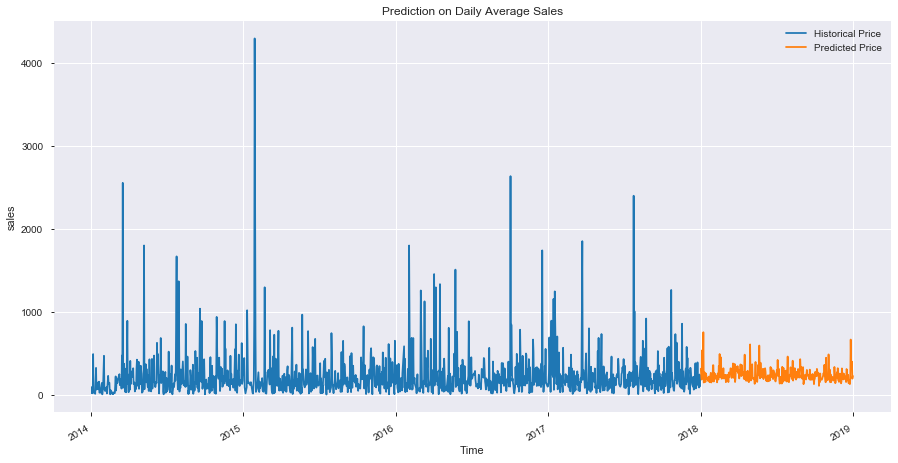

In [51]:
plt.figure(figsize=(15,8))
(df3['Sales']).plot(label='Historical Price')
(forecasted_0['Sales']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('sales')
plt.title('Prediction on Daily Average Sales')
plt.legend()
plt.show()

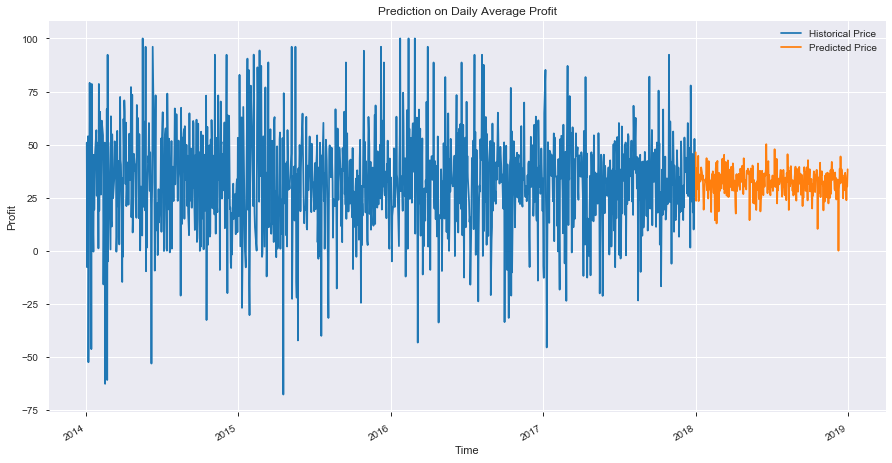

In [52]:
plt.figure(figsize=(15,8))
(df3['Profit %']).plot(label='Historical Price')
(forecasted_1['Profit %']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Profit')
plt.title('Prediction on Daily Average Profit')
plt.legend()
plt.show()

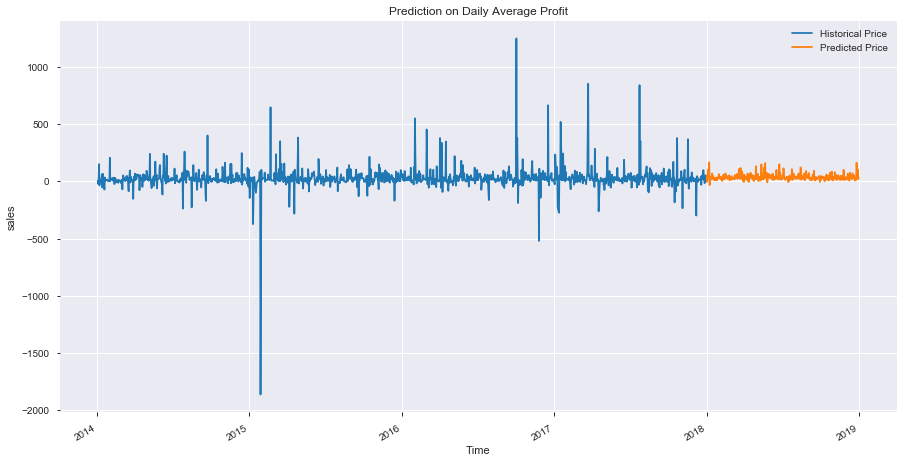

In [53]:
plt.figure(figsize=(15,8))
(df3['Profit']).plot(label='Historical Price')
(forecasted_2['Profit']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('sales')
plt.title('Prediction on Daily Average Profit')
plt.legend()
plt.show()

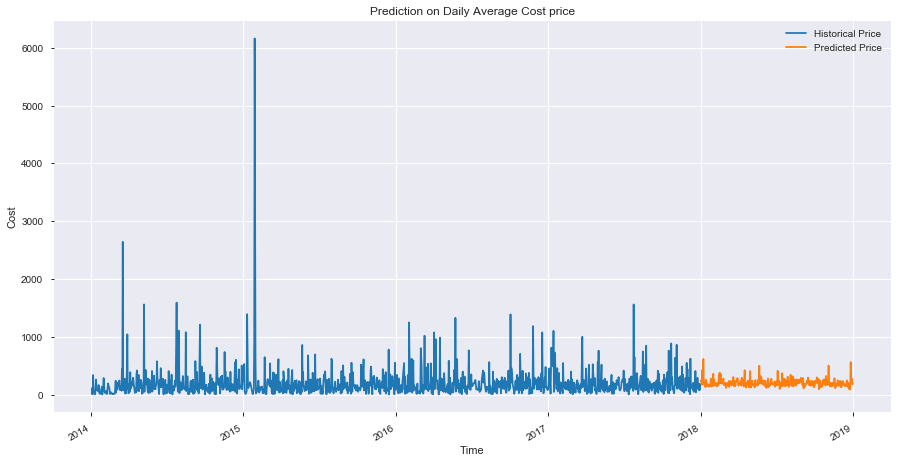

In [54]:
plt.figure(figsize=(15,8))
(df3['Cost']).plot(label='Historical Price')
(forecasted_3['Cost']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Cost')
plt.title('Prediction on Daily Average Cost price')
plt.legend()
plt.show()

In [55]:
A['order_year']=A.index.year
A.tail()

Sales   Profit %      Profit        Cost  order_year
2018-12-27  324.477082  31.271407   64.865800  253.648848        2018
2018-12-28  310.928454  23.851170   21.043757  281.319518        2018
2018-12-29  398.639595  31.669237  102.717968  272.135916        2018
2018-12-30  193.066343  30.332191   41.889047  177.805759        2018
2018-12-31  225.853872  38.402978   20.882085  197.359373        2018

Text(0.5, 1.0, 'Year wise Total Sales')

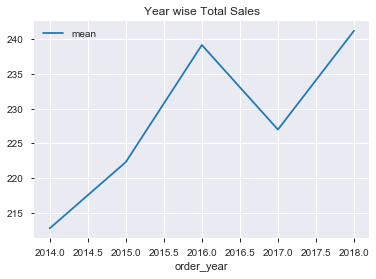

In [56]:
#Sales per year
A.groupby('order_year')['Sales'].agg(['mean']).plot.line()
plt.title('Year wise Total Sales')

Text(0.5, 1.0, 'Year wise Total Profit %')

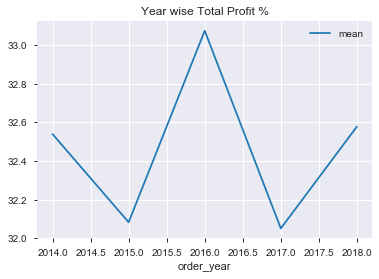

In [57]:
#Profit per year
A.groupby('order_year')['Profit %'].agg(['mean']).plot.line()
plt.title('Year wise Total Profit %')

Text(0.5, 1.0, 'Year wise Total Sales')

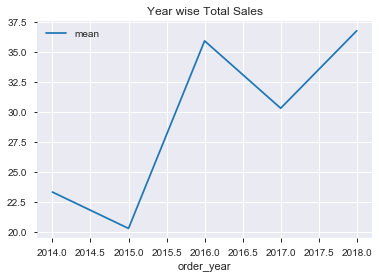

In [58]:
#Sales per year
A.groupby('order_year')['Profit'].agg(['mean']).plot.line()
plt.title('Year wise Total Sales')

Text(0.5, 1.0, 'Year wise Total Cost')

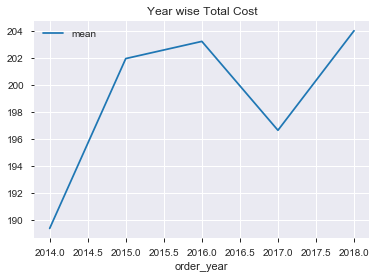

In [59]:
#Cost price per year
A.groupby('order_year')['Cost'].agg(['mean']).plot.line()
plt.title('Year wise Total Cost')

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

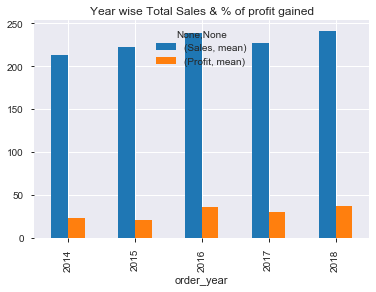

In [60]:
#Sales and profit per year
A.groupby('order_year')['Sales','Profit'].agg(['mean']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

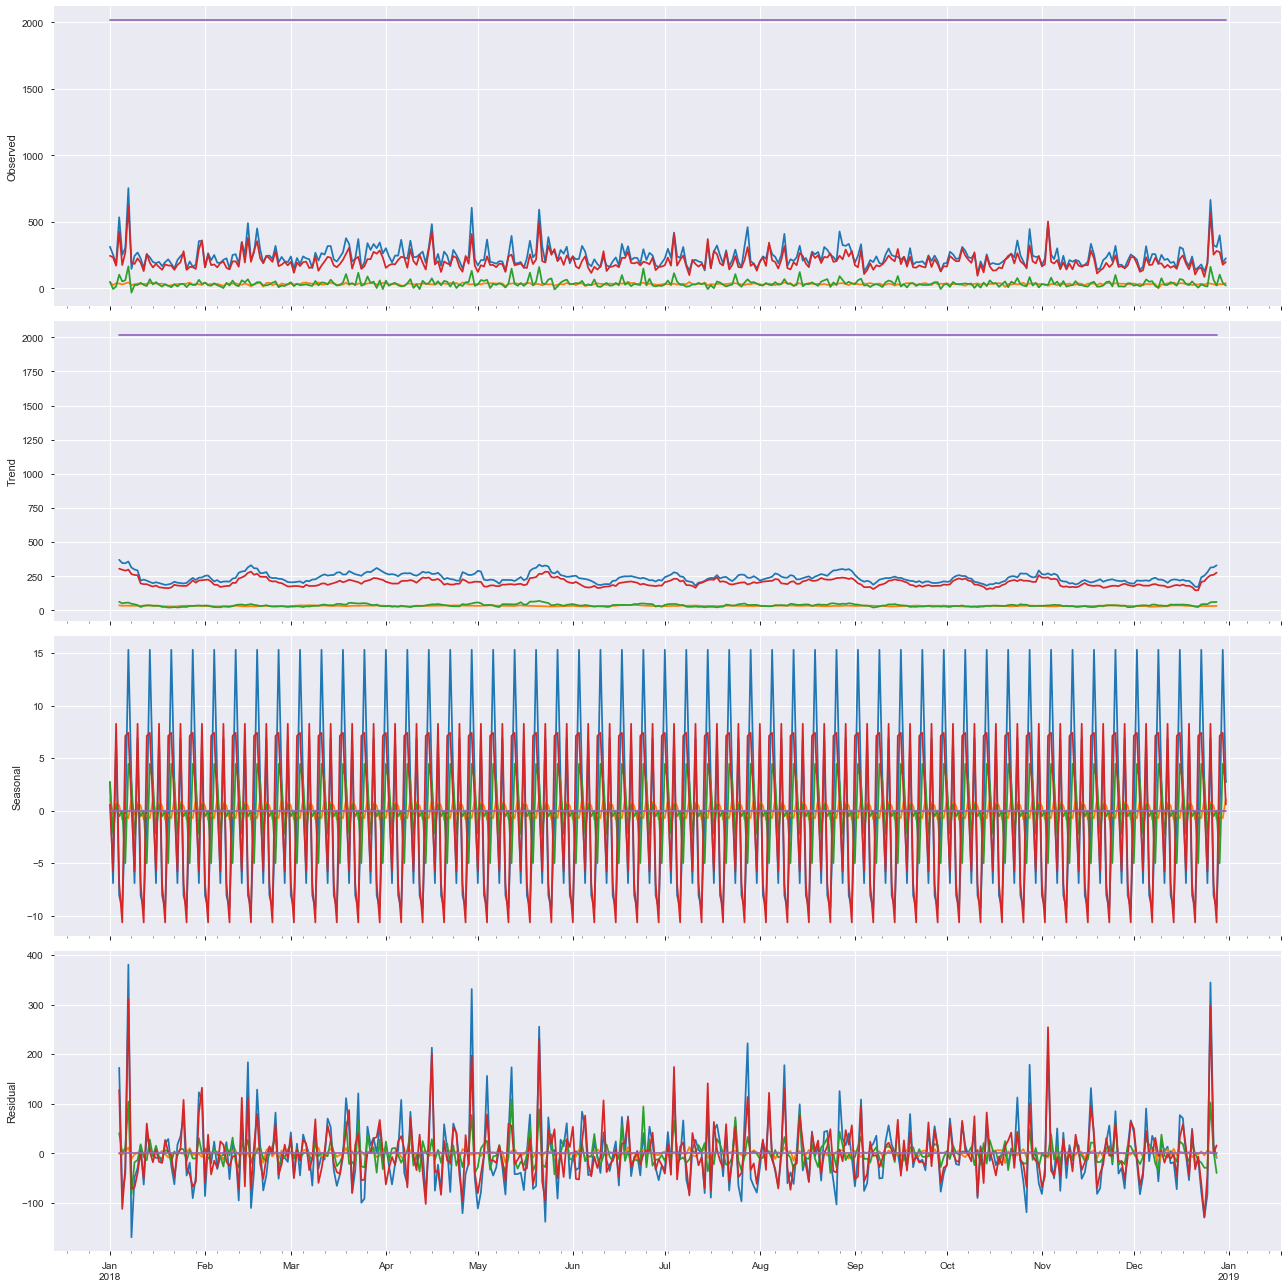

In [61]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 18
decomposition = sm.tsa.seasonal_decompose(A['2018':], model='additive')
fig = decomposition.plot()
plt.show()

In [62]:
A.tail()

Sales   Profit %      Profit        Cost  order_year
2018-12-27  324.477082  31.271407   64.865800  253.648848        2018
2018-12-28  310.928454  23.851170   21.043757  281.319518        2018
2018-12-29  398.639595  31.669237  102.717968  272.135916        2018
2018-12-30  193.066343  30.332191   41.889047  177.805759        2018
2018-12-31  225.853872  38.402978   20.882085  197.359373        2018

In [63]:
A.shape

(1602, 5)

In [64]:
A.to_csv('A.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
Order_ID             9994 non-null object
Order_Date           9994 non-null datetime64[ns]
Ship_Date            9994 non-null datetime64[ns]
Ship_Mode            9994 non-null object
Customer_ID          9994 non-null object
Customer_Name        9994 non-null object
Segment              9994 non-null object
City                 9994 non-null object
State                9994 non-null object
Postal_Code          9994 non-null int64
Region               9994 non-null object
Product_ID           9994 non-null object
Category             9994 non-null object
Sub-Category         9994 non-null object
Product_Name         9994 non-null object
Sales                9994 non-null float64
Quantity             9994 non-null int64
Discount             9994 non-null float64
Profit               9994 non-null float64
Cost                 9994 non-null float64
Profit %             9994 non-null 

#### Regression Model

In [66]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV,Ridge,RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,learning_curve,train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

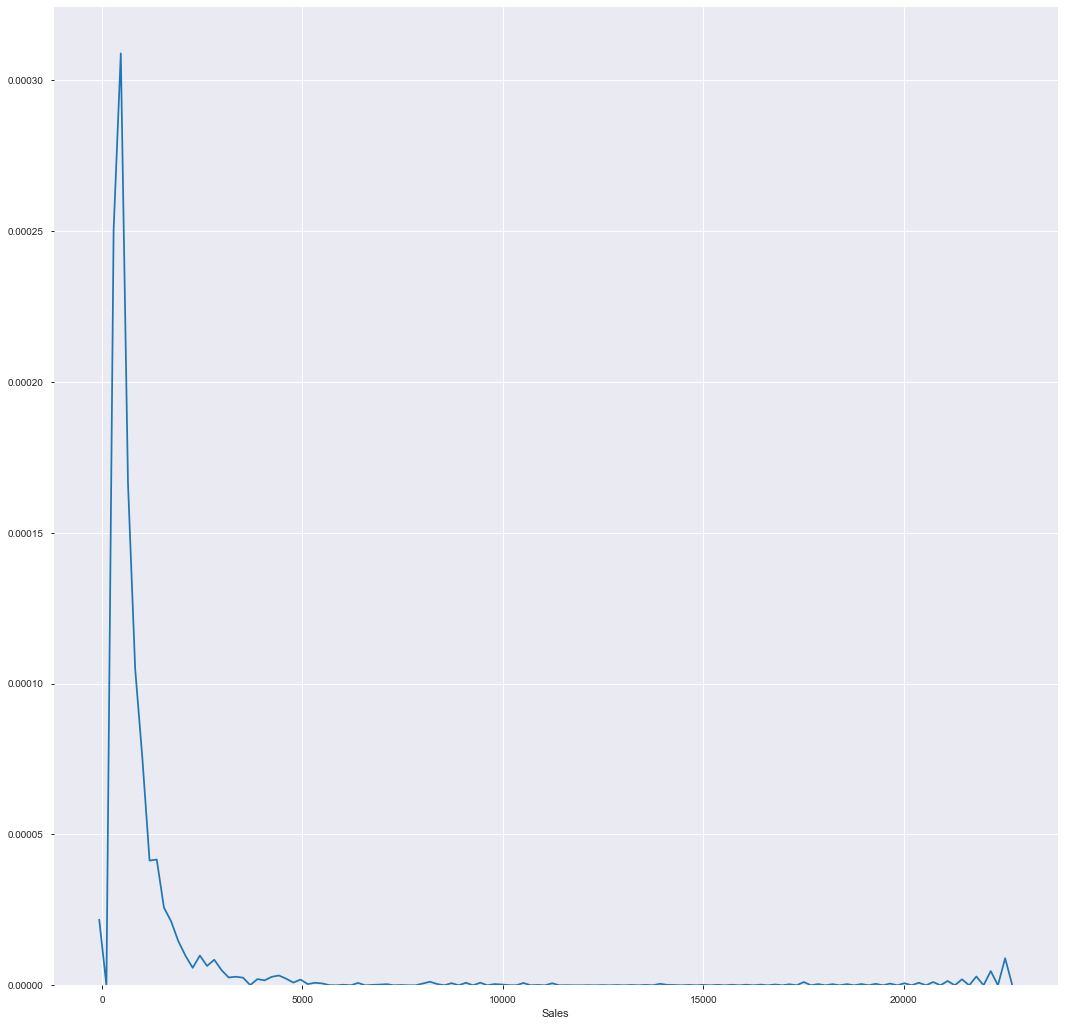

In [67]:
sns.distplot(df['Sales'],hist=False)

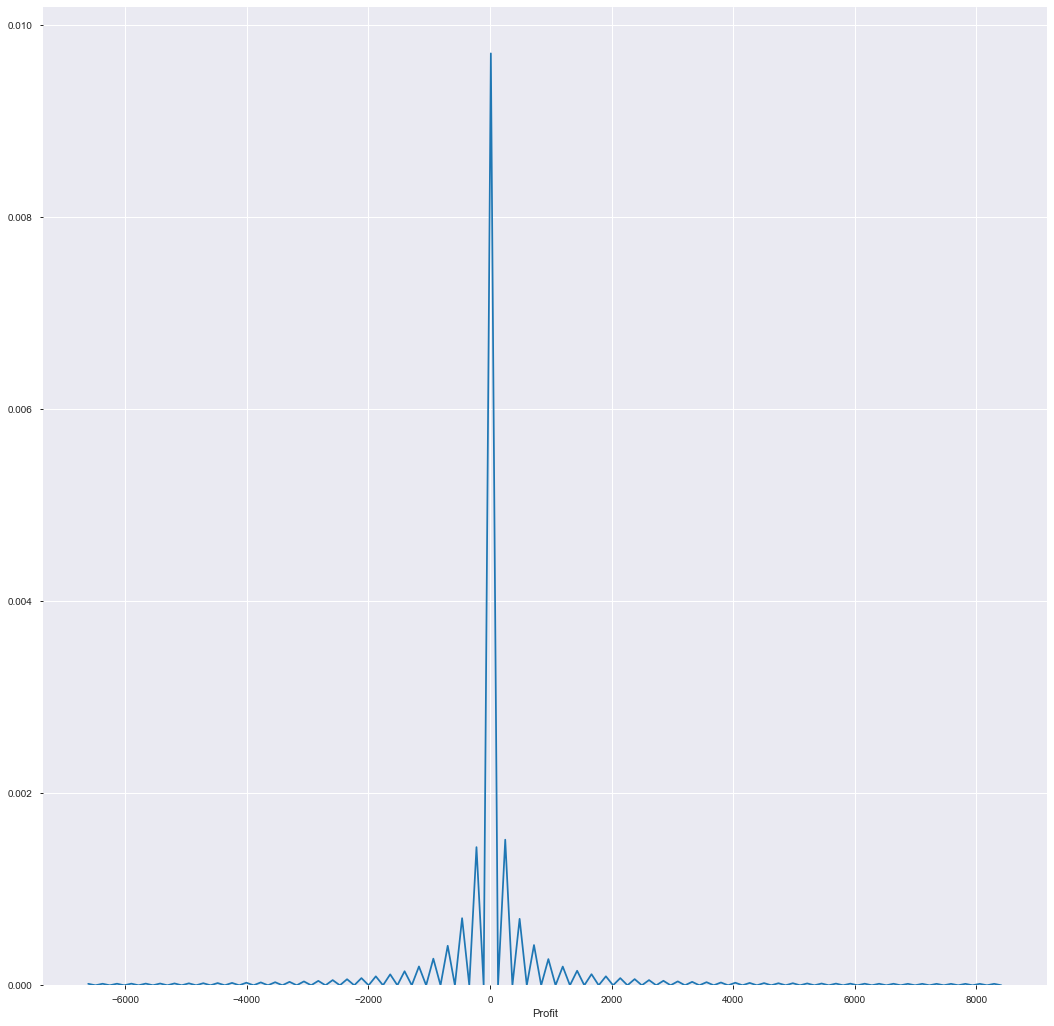

In [68]:
sns.distplot(df['Profit'],hist=False)

In [69]:
df1=df.copy()

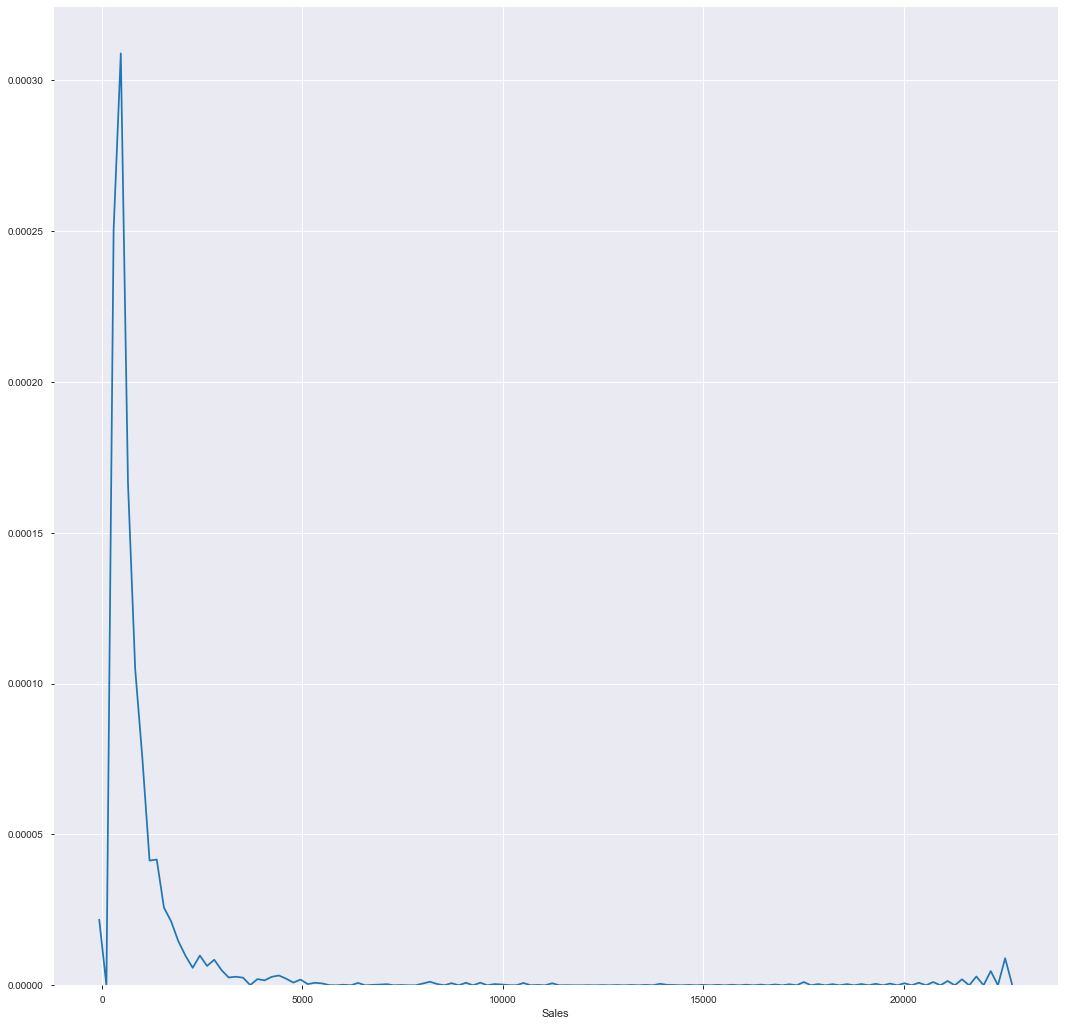

In [70]:
df1['Sales'] = df['Sales'].transform(lambda x: np.log(x))
sns.distplot(df['Sales'],hist=False)

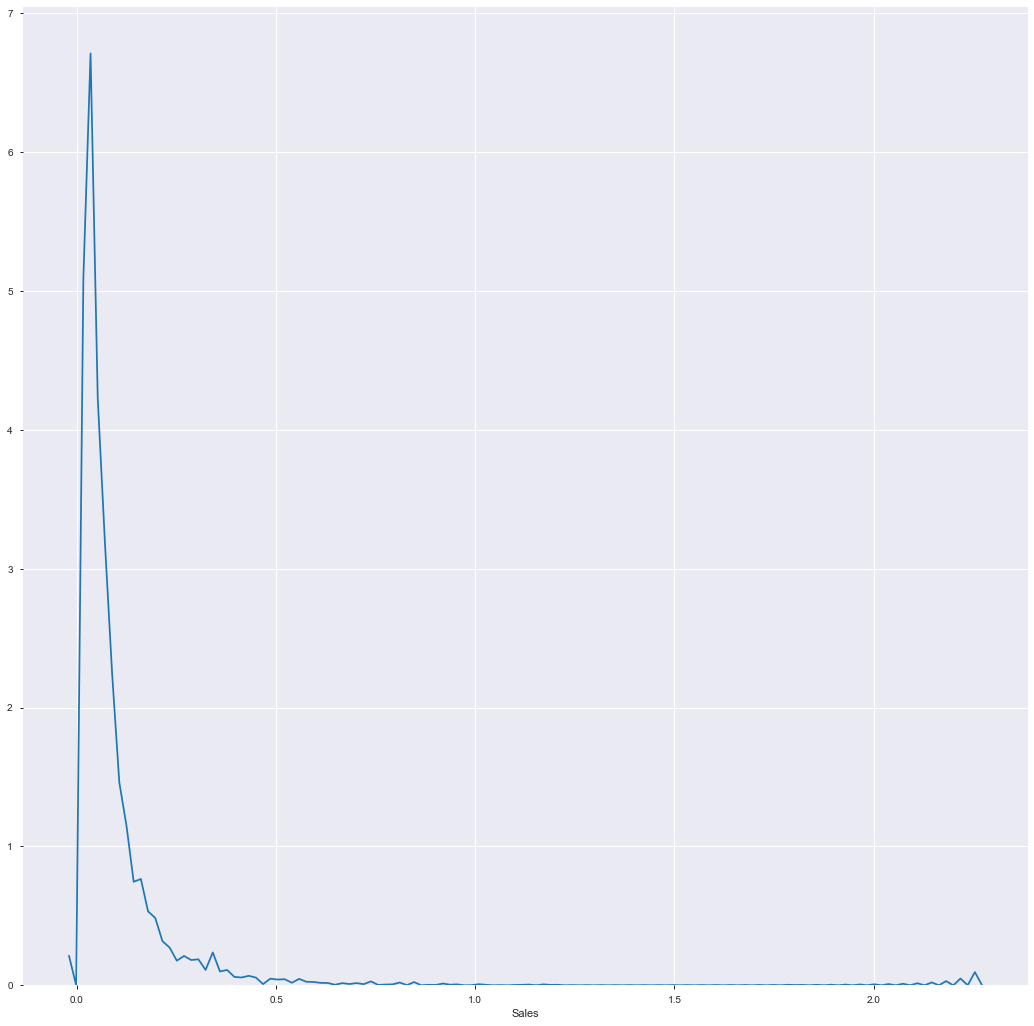

In [71]:
df1['Sales'] = df['Sales'].transform(lambda x: 1/(x))
sns.distplot(df1['Sales'],hist=False)

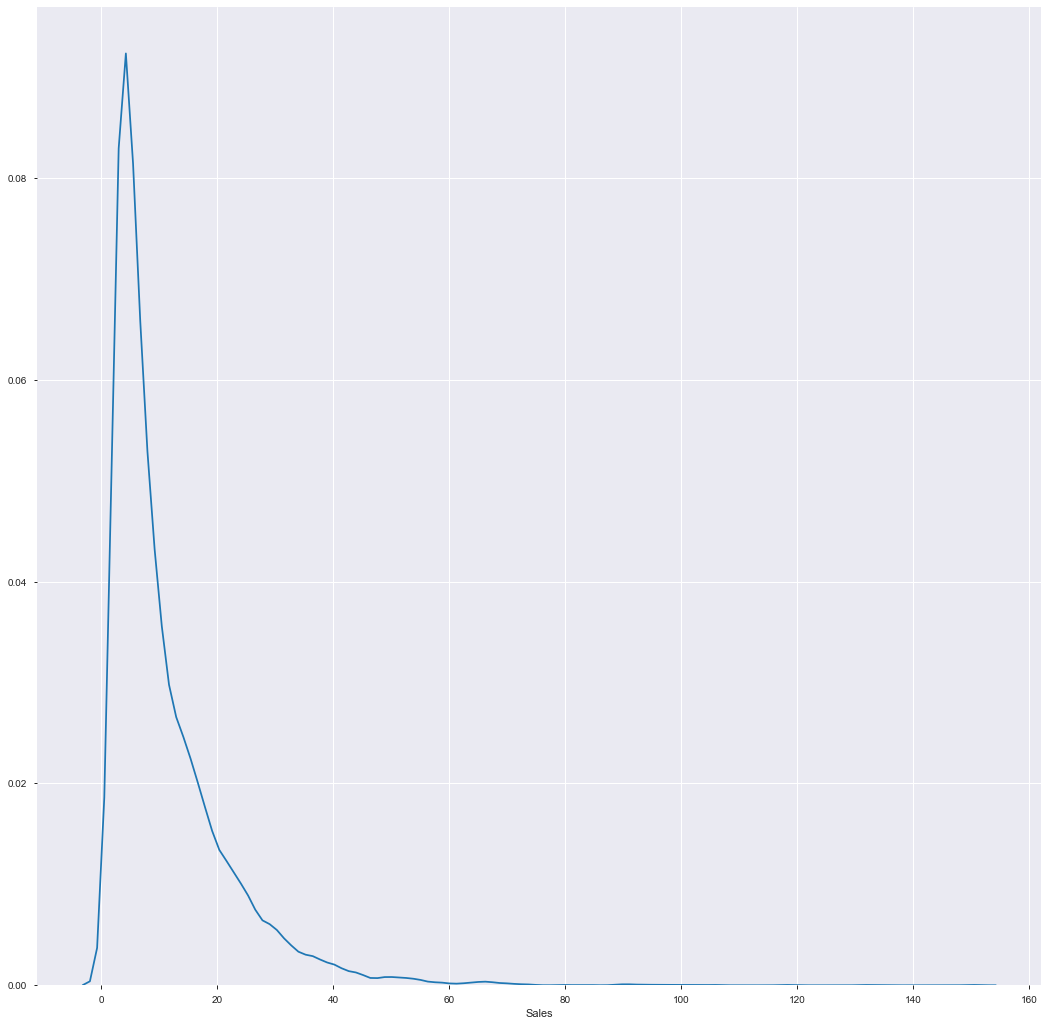

In [72]:
df1['Sales'] = df['Sales'].transform(lambda x: np.sqrt(x))
sns.distplot(df1['Sales'],hist=False)

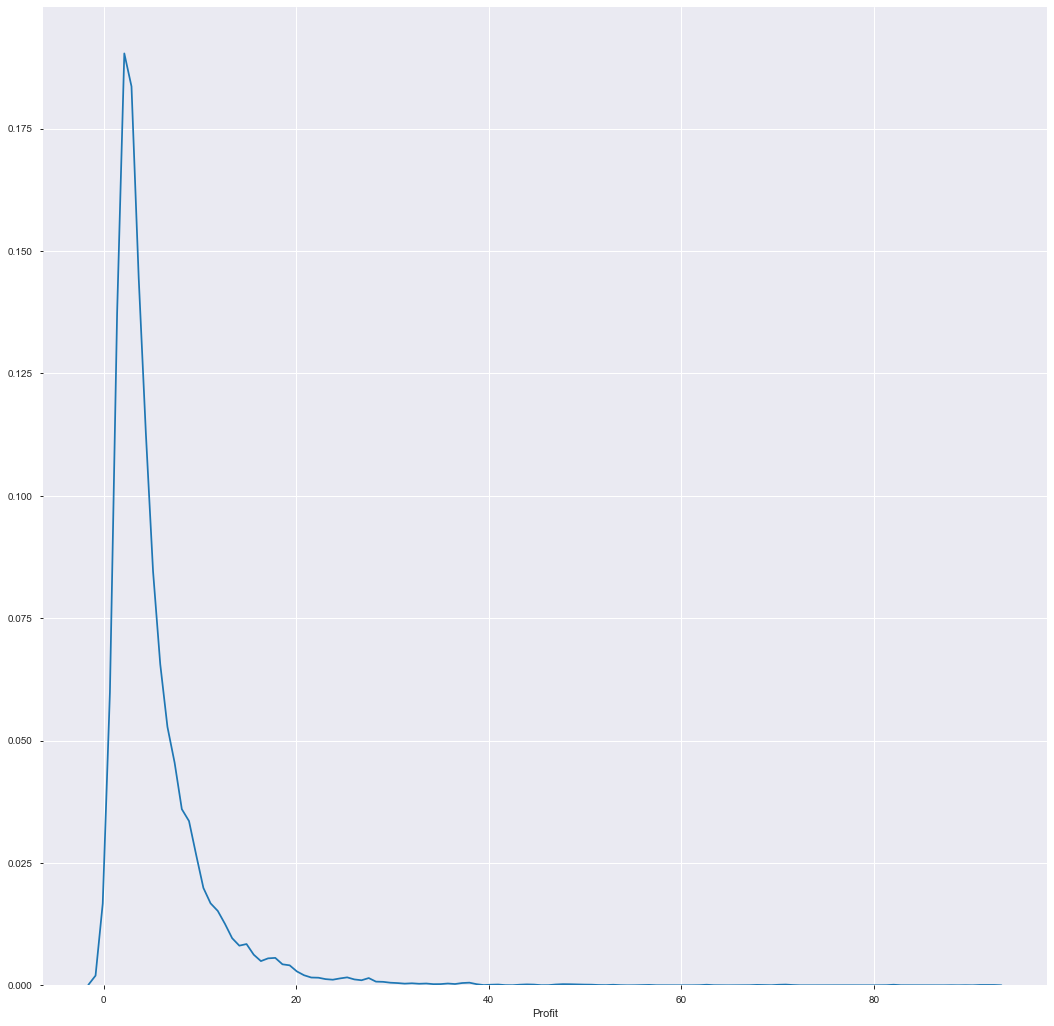

In [73]:
df1['Profit'] = df['Profit'].transform(lambda x: np.sqrt(x))
sns.distplot(df1['Profit'],hist=False)

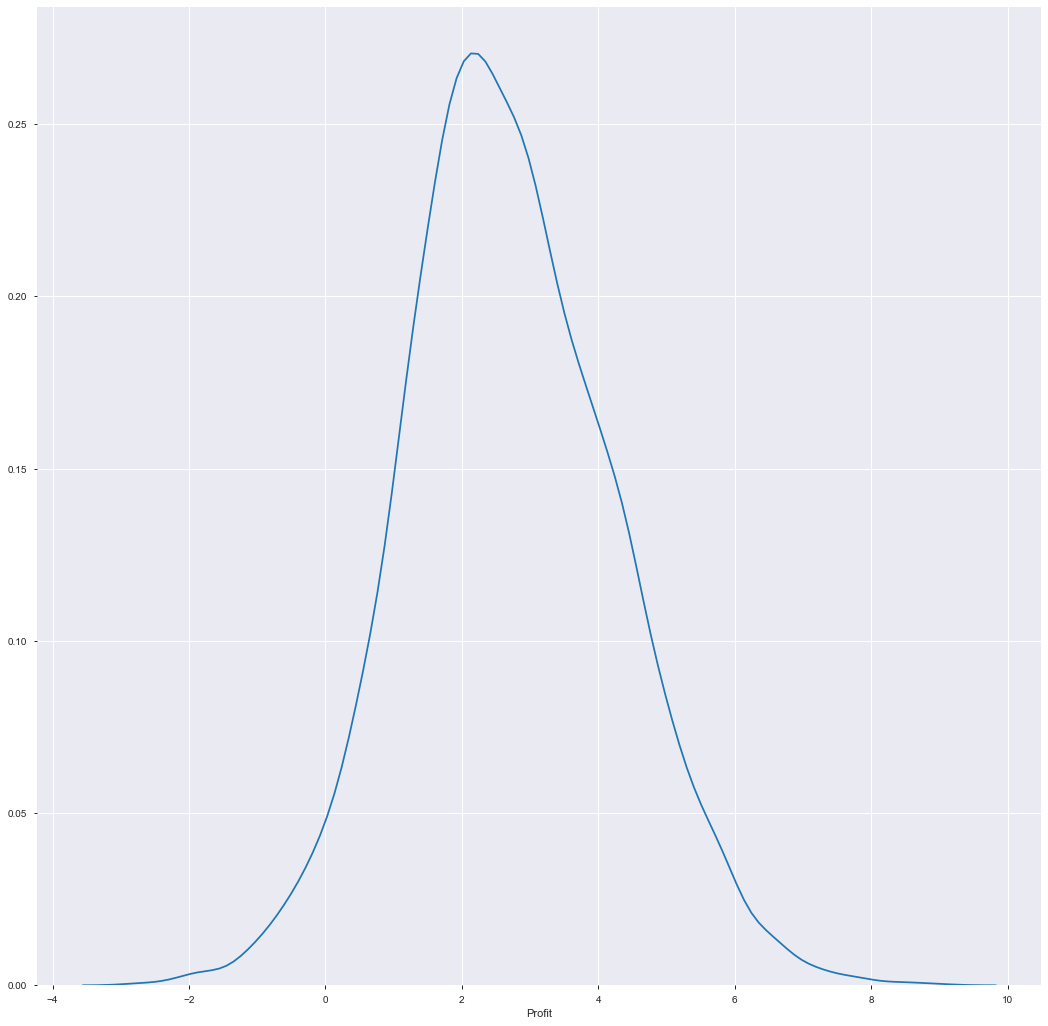

In [74]:
df1['Profit'] = df['Profit'].transform(lambda x: np.log(x))
sns.distplot(df1['Profit'],hist=False)

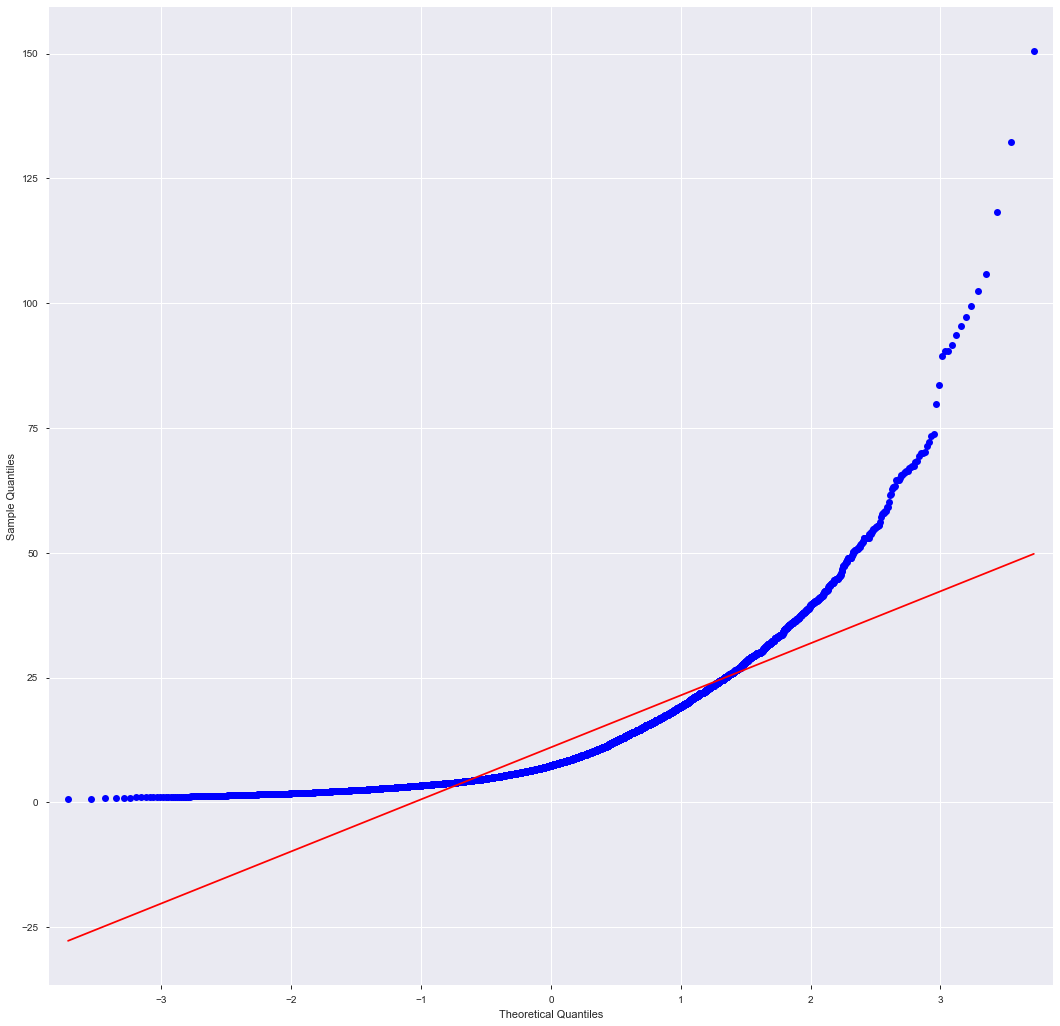

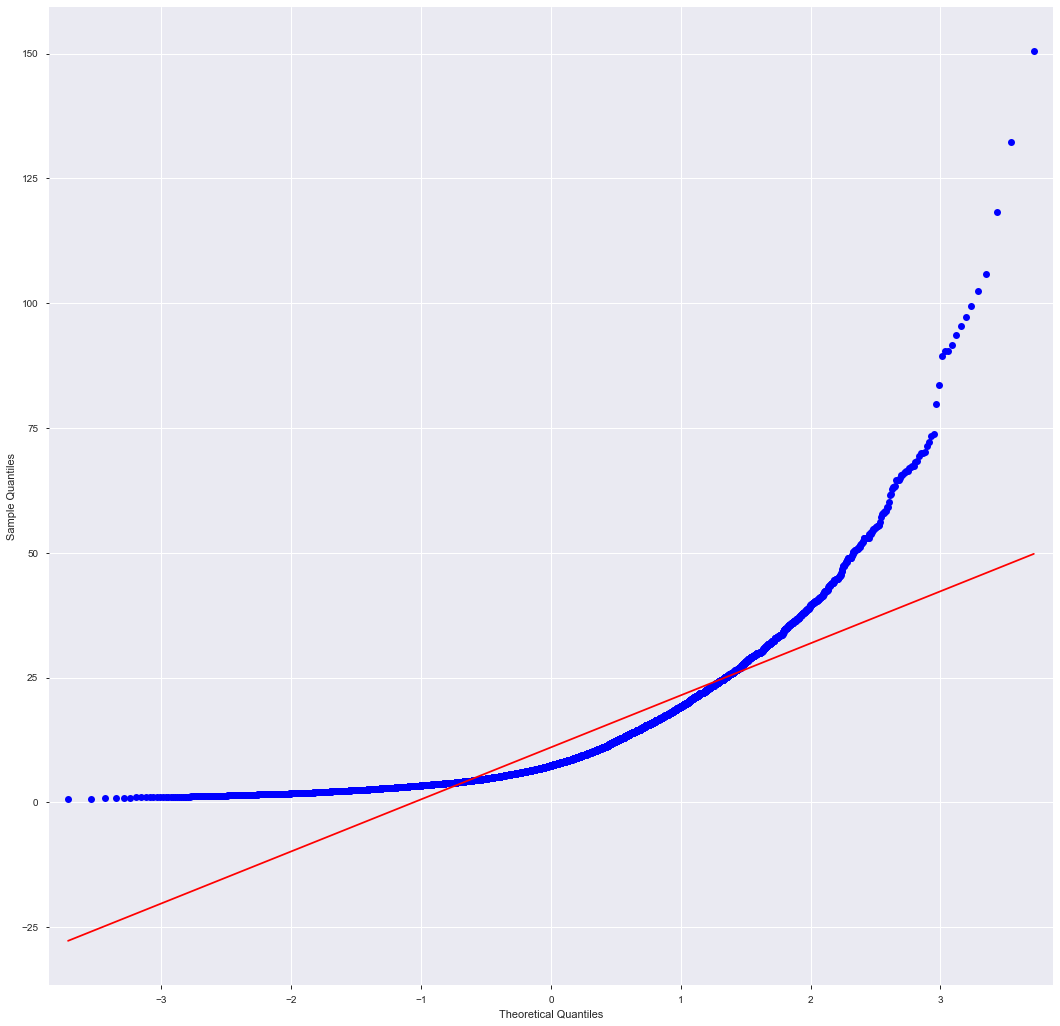

In [75]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df1['Sales'], line='s')

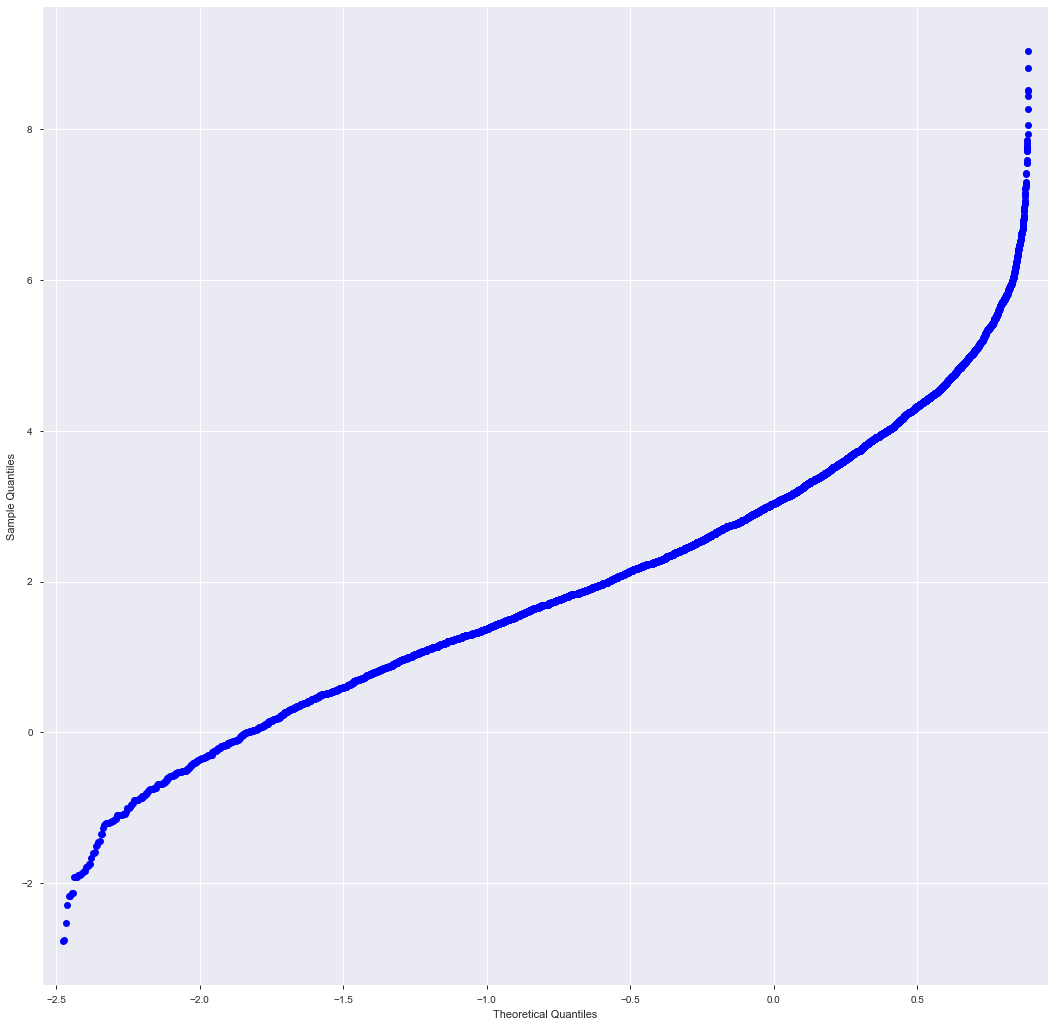

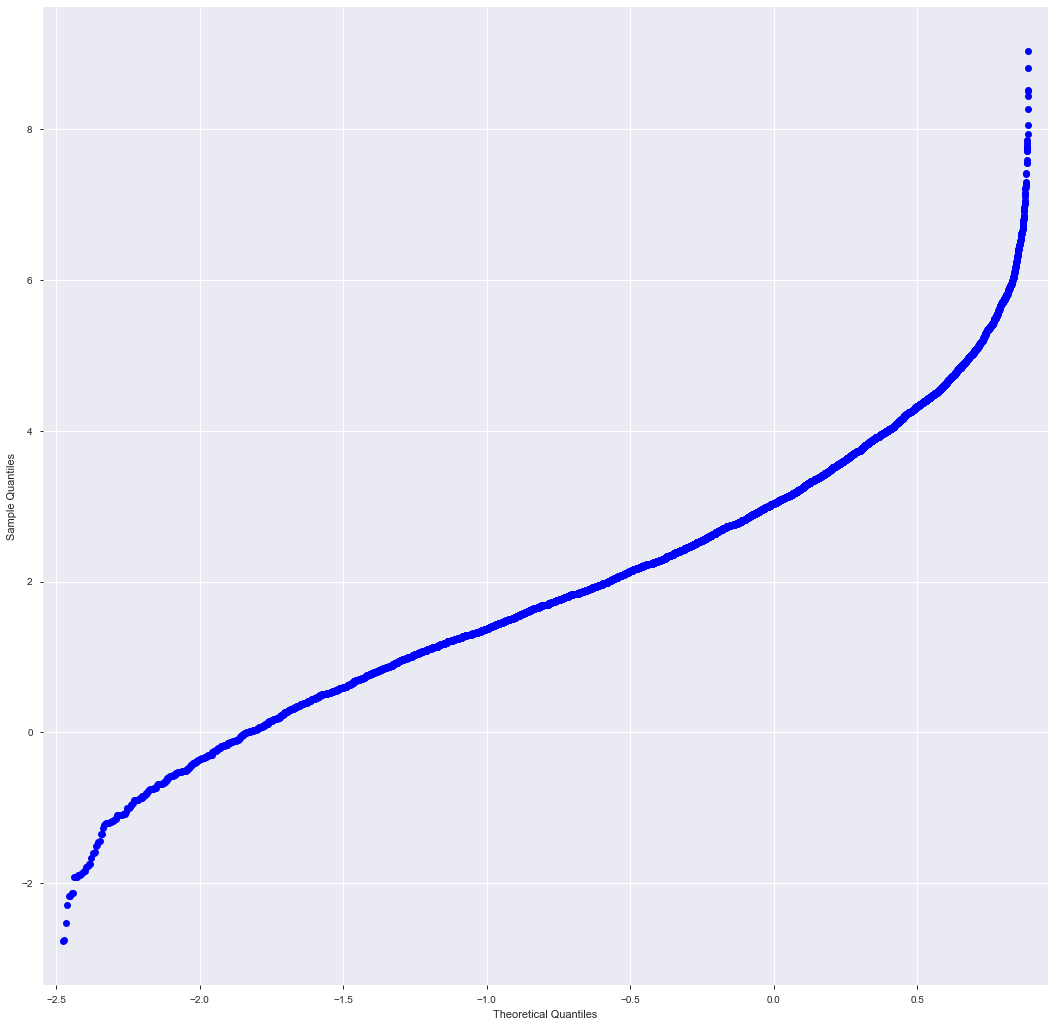

In [76]:
qqplot(df1['Profit'], line='s')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
Order_ID             9994 non-null object
Order_Date           9994 non-null datetime64[ns]
Ship_Date            9994 non-null datetime64[ns]
Ship_Mode            9994 non-null object
Customer_ID          9994 non-null object
Customer_Name        9994 non-null object
Segment              9994 non-null object
City                 9994 non-null object
State                9994 non-null object
Postal_Code          9994 non-null int64
Region               9994 non-null object
Product_ID           9994 non-null object
Category             9994 non-null object
Sub-Category         9994 non-null object
Product_Name         9994 non-null object
Sales                9994 non-null float64
Quantity             9994 non-null int64
Discount             9994 non-null float64
Profit               9994 non-null float64
Cost                 9994 non-null float64
Profit %             9994 non-null 

In [78]:
df2=df.copy()
a=df2.select_dtypes(include='object')
a=a.drop(['Order_ID','Customer_ID','Customer_Name'],1)
a.columns

Index(['Ship_Mode', 'Segment', 'City', 'State', 'Region', 'Product_ID',
       'Category', 'Sub-Category', 'Product_Name'],
      dtype='object')

In [79]:
a['Ship_Mode']=LabelEncoder().fit_transform(a['Ship_Mode'])
a['Segment']=LabelEncoder().fit_transform(a['Segment'])
a['City']=LabelEncoder().fit_transform(a['City'])
a['State']=LabelEncoder().fit_transform(a['State'])
a['Region']=LabelEncoder().fit_transform(a['Region'])
a['Product_ID']=LabelEncoder().fit_transform(a['Product_ID'])
a['Category']=LabelEncoder().fit_transform(a['Category'])
a['Sub-Category']=LabelEncoder().fit_transform(a['Sub-Category'])
a['Product_Name']=LabelEncoder().fit_transform(a['Product_Name'])

In [80]:
df2.select_dtypes(exclude='object').columns

Index(['Order_Date', 'Ship_Date', 'Postal_Code', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Cost', 'Profit %', 'Shipment_Duration',
       'order_year', 'Purchases'],
      dtype='object')

In [81]:
df3=pd.concat([a,df2.select_dtypes(exclude='object')],join='outer',axis=1)
df3=df3.drop(['Order_Date','Ship_Date','Purchases'],1)

In [82]:
y=df3['Profit']
x=df3.drop('Profit',1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 

In [83]:
df3.isnull().sum()

Ship_Mode            0
Segment              0
City                 0
State                0
Region               0
Product_ID           0
Category             0
Sub-Category         0
Product_Name         0
Postal_Code          0
Sales                0
Quantity             0
Discount             0
Profit               0
Cost                 0
Profit %             0
Shipment_Duration    0
order_year           0
dtype: int64

In [84]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 1.0


Text(0.5, 1.0, 'Signifiacant variables')

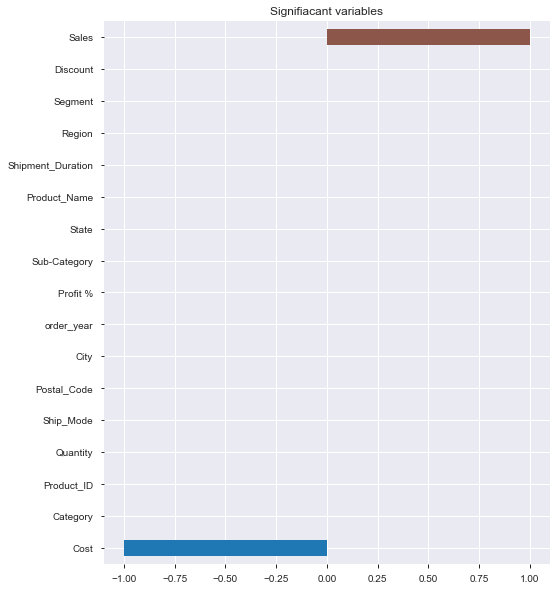

In [85]:
coef = pd.Series(lin_reg.coef_, index = x.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Signifiacant variables")

In [86]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x)
lin_reg1 = sm.OLS(y,X_constant).fit()
lin_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.730e+30
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:12:34   Log-Likelihood:             2.5483e+05
No. Observations:                9994   AIC:                        -5.096e+05
Df Residuals:                    9976   BIC:                        -5.095e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.979e-11   3.67e-11     -0.811      0.418   -1.02e-10    4.22e-11
Ship_Mode           1.11e-15   2.68e-14      0.041      0.967   -5.14e-14    5.36e-14
Segment           -3.997e-15   2.68e-14     -0.149      0.882   -5.66e-14    4.86e-14
City              -6.974e-16   1.56e-16     -4.467      0.000      -1e-15   -3.91e-16
State             -6.384e-16   1.51e-15     -0.424      0.672   -3.59e-15    2.32e-15
Region             1.155e-14    2.3e-14      0.502      0.615   -3.35e-14    5.66e-14
Product_ID         -2.81e-16   1.71e-16     -1.645      0.100   -6.16e-16    5.39e-17
Category           3.495e-13   1.34e-13      2.612      0.009    8.72e-14    6.12e-13
Sub-Category       5.967e-15   8.41e-15      0.709      0.478   -1.05e-14    2.25e-14
Product_Name       8.674e-18   3.98e-17      0.218      0.828   -6.94e-17    8.67e-17
Postal_Code       -7.747e-18   7.43e-19    -10.422      0.000    -9.2e-18   -6.29e-18
Sales                 1.0000   9.13e-17    1.1e+16      0.000       1.000       1.000
Quantity          -5.662e-15    9.4e-15     -0.602      0.547   -2.41e-14    1.28e-14
Discount          -1.954e-13   1.63e-13     -1.200      0.230   -5.15e-13    1.24e-13
Cost                 -1.0000   1.04e-16  -9.58e+15      0.000      -1.000      -1.000
Profit %          -6.245e-16   8.09e-16     -0.772      0.440   -2.21e-15    9.62e-16
Shipment_Duration          0   1.69e-14          0      1.000    -3.3e-14     3.3e-14
order_year         1.599e-14   1.82e-14      0.877      0.380   -1.97e-14    5.17e-14
==============================================================================
Omnibus:                    11657.766   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4927743.445
Skew:                          -5.609   Prob(JB):                         0.00
Kurtosis:                     111.203   Cond. No.                     1.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

Ship_Mode   Segment      City     State    Region  Product_ID   Category  \
vif   2.081224  1.003281  1.130166  1.307694  1.708483   19.399755  16.987065   

     Sub-Category  Product_Name  Postal_Code     Sales  Quantity  Discount  \
vif      4.326634      1.072106     1.360212  7.752397  1.048541  2.705887   

         Cost  Profit %  Shipment_Duration  order_year  
vif  7.924463  2.663579           2.078639    1.004041

In [88]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Segment', 'City', 'State', 'Product_ID', 'Category', 'Postal_Code', 'Sales', 'Cost']


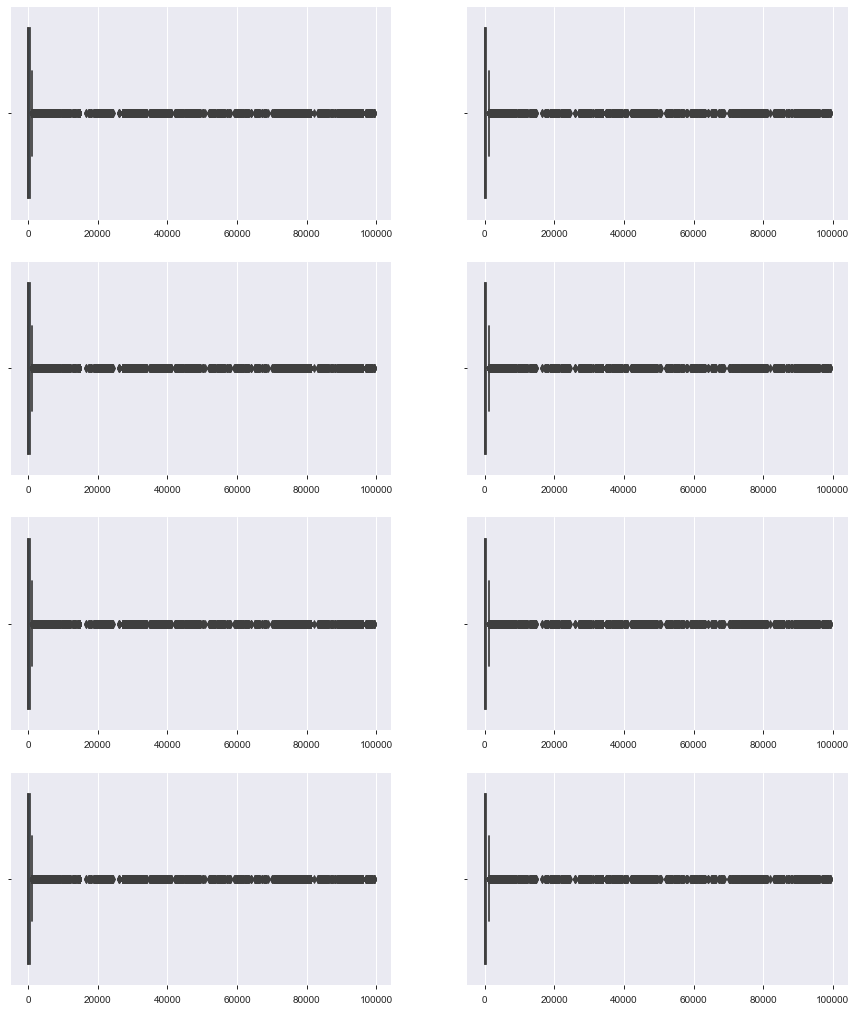

In [89]:
fig,ax=plt.subplots(4,2,figsize=(15,18))
for i in range(8):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df3[selected_features_BE],hue=df3['order_year'])

#### Logistic Regression

In [90]:
X_train_A

Cost  Discount   Postal_Code      Profit  Quantity  \
181   317.207875  0.075000  32902.000000  142.472625  4.500000   
778    49.980575  0.175000  55351.125000   12.258175  3.375000   
69     46.298987  0.025000  70318.875000   13.181512  3.125000   
131   458.374460  0.080000  74935.800000  225.325940  3.200000   
442   280.127867  0.066667  51756.000000   99.301467  3.000000   
695    86.669050  0.141667  39070.916667    4.842283  3.500000   
135   276.469043  0.271429  47557.571429    5.744957  3.714286   
164   169.915933  0.000000  64731.000000   23.437400  5.000000   
28      9.027200  0.000000  89031.000000    5.532800  2.000000   
669  1076.626000  0.000000  53209.000000  378.274000  5.000000   
193    13.272000  0.400000  43552.000000   -2.232000  5.000000   
291   265.236307  0.220000  63792.133333   27.709493  4.200000   
481    34.174320  0.440000  82242.600000    1.530880  2.600000   
467   115.243940  0.344000  77084.200000  -16.270100  3.200000   
140   256.004833  0.350000  23989.000000   18.293667  4.000000   
173   217.422677  0.084615  69808.923077   86.856477  4.230769   
6      16.088150  0.000000  22153.000000   11.326850  1.000000   
651   470.510830  0.275000  46349.800000  -27.166730  3.500000   
396   249.089536  0.063636  33442.909091  112.907555  3.272727   
73    228.414557  0.171429  74869.142857   51.406871  3.857143   
601   159.516000  0.133333  77023.000000   88.166000  5.333333   
311  1391.408800  0.400000  10011.000000 -373.304800  4.000000   
433    70.184400  0.200000  32725.000000   37.791600  3.000000   
145    40.865800  0.100000  51618.000000   20.986200  3.500000   
234    51.456600  0.100000  94110.000000   45.704400  3.000000   
220    66.340114  0.200000  85281.000000   19.109029  2.571429   
499    16.493600  0.000000  23602.000000   14.626400  4.000000   
861   221.307563  0.190526  66533.210526    3.266058  3.736842   
132   127.567500  0.200000  90036.000000   12.232500  5.000000   
870   146.871937  0.112500  31892.562500   26.506937  2.625000   
..           ...       ...           ...         ...       ...   
160   139.813650  0.075000  70454.875000   28.729350  3.875000   
276    51.831250  0.275000  53508.750000    2.957250  6.000000   
191    76.699160  0.240000  53223.000000   17.188040  3.400000   
385   114.623543  0.100000  59644.571429   16.940171  3.285714   
805   240.103585  0.230769  36996.000000  -58.134662  4.538462   
413   121.650500  0.225000  55848.375000    1.170000  2.875000   
491   211.552086  0.235714  24014.714286   -2.790157  3.642857   
343   540.746100  0.100000  94122.000000  236.875900  4.500000   
769   137.360200  0.050000  40270.500000   26.121800  3.500000   
308    38.793900  0.100000  52725.000000   10.418100  3.333333   
661   542.249250  0.000000  41547.500000  131.235750  4.000000   
130   171.776100  0.050000  20298.500000   19.171900  5.000000   
663    18.958200  0.000000  31907.000000   11.941800  2.333333   
99    241.551350  0.312500  64696.750000  -36.201100  4.000000   
372    40.281900  0.066667  41680.333333   16.232100  3.000000   
87    254.034311  0.088889  35872.000000   32.463022  3.222222   
458    87.985150  0.000000  40214.000000   43.502350  8.000000   
330   140.629300  0.050000  76180.750000   59.668200  3.875000   
214    96.145185  0.253846  54930.076923   17.748200  3.769231   
466    23.105000  0.450000  75220.000000   -4.942500  4.000000   
121    92.553040  0.080000  16673.800000   -1.298640  2.400000   
614   339.154060  0.230000  81663.800000  -28.422460  4.100000   
20    114.424900  0.000000  48234.000000    5.825100  2.000000   
700   169.363643  0.142857  47204.285714   22.099786  2.285714   
71    103.936523  0.130769  69343.769231   23.039631  2.923077   
106    27.986400  0.000000  36052.000000   17.823600  7.000000   
270   298.734916  0.147368  62499.842105   -5.124074  3.947368   
860   197.307645  0.200000  77135.300000   -2.866745  3.900000   
435    97.491257  0.085714  65992.714286   22.074171